In [52]:
import pandas as pd
import json
import ast
import numpy as np

## Credit Data Cleaning

In [4]:
df = pd.read_csv('credits.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [6]:
df.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

In [7]:
df_credit = df

In [8]:
for i in df:
    print('number of unique values{}:'.format(i), df_credit[i].nunique())

number of unique valuescast: 43019
number of unique valuescrew: 44669
number of unique valuesid: 45432


In [9]:
df_credit = df_credit.drop_duplicates()
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45439 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45439 non-null  object
 1   crew    45439 non-null  object
 2   id      45439 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [10]:
cast = df_credit['cast'].to_list() 
crew = df_credit['crew'].to_list() 
movie_id = df_credit['id'].to_list()

In [11]:
cast_index = 0 
cast_df = []
while cast_index < len(cast): 
    movie = movie_id[cast_index]
    movie_cast = ast.literal_eval(cast[cast_index])
    cast_len = len(movie_cast)
    act_num = 0
    while act_num < cast_len :         
        cast_id = movie_cast[act_num]['cast_id']
        charater = movie_cast[act_num]['character']
        gender = movie_cast[act_num]['gender']
        actor = movie_cast[act_num]['name'] 
        row = [movie,cast_id,charater,gender,actor]
        cast_df.append(row)
        act_num+=1    
    
    cast_index+=1 
    print('{}% completed'.format(round(100*cast_index/(45439+1)),2))
    print('movie {} completed'.format(movie))
         
 
    
    

0% completed
movie 862 completed
0% completed
movie 8844 completed
0% completed
movie 15602 completed
0% completed
movie 31357 completed
0% completed
movie 11862 completed
0% completed
movie 949 completed
0% completed
movie 11860 completed
0% completed
movie 45325 completed
0% completed
movie 9091 completed
0% completed
movie 710 completed
0% completed
movie 9087 completed
0% completed
movie 12110 completed
0% completed
movie 21032 completed
0% completed
movie 10858 completed
0% completed
movie 1408 completed
0% completed
movie 524 completed
0% completed
movie 4584 completed
0% completed
movie 5 completed
0% completed
movie 9273 completed
0% completed
movie 11517 completed
0% completed
movie 8012 completed
0% completed
movie 1710 completed
0% completed
movie 9691 completed
0% completed
movie 12665 completed
0% completed
movie 451 completed
0% completed
movie 16420 completed
0% completed
movie 9263 completed
0% completed
movie 17015 completed
0% completed
movie 902 completed
0% complete

In [12]:
df_cast = pd.DataFrame(cast_df,columns = ['movie','cast_id','charater','gender','actor']) 
df_cast.head()

movie  cast_id                 charater  gender          actor
0    862       14            Woody (voice)       2      Tom Hanks
1    862       15   Buzz Lightyear (voice)       2      Tim Allen
2    862       16  Mr. Potato Head (voice)       2    Don Rickles
3    862       17       Slinky Dog (voice)       2     Jim Varney
4    862       18              Rex (voice)       2  Wallace Shawn

In [13]:
df_cast.to_csv('cast.csv', sep=',')


In [14]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562132 entries, 0 to 562131
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   movie     562132 non-null  int64 
 1   cast_id   562132 non-null  int64 
 2   charater  562132 non-null  object
 3   gender    562132 non-null  int64 
 4   actor     562132 non-null  object
dtypes: int64(3), object(2)
memory usage: 21.4+ MB


In [15]:
crew_index = 0 
crew_df = []
while crew_index < len(cast): 
    movie = movie_id[crew_index]
    movie_crew = ast.literal_eval(crew[crew_index])
    for personnel in movie_crew:
        credit_id = personnel['credit_id']
        crew_id = personnel['id']
        department = personnel['department']
        gender = personnel['gender']
        name =personnel['name'] 
        job = personnel['job']
        row = [movie,credit_id,crew_id,department,name,job,gender]
        crew_df.append(row)
    crew_index+=1 
    print('{}% completed'.format(round(100*crew_index/(45439+1)),2))
    print('movie {} completed'.format(movie))         

0% completed
movie 862 completed
0% completed
movie 8844 completed
0% completed
movie 15602 completed
0% completed
movie 31357 completed
0% completed
movie 11862 completed
0% completed
movie 949 completed
0% completed
movie 11860 completed
0% completed
movie 45325 completed
0% completed
movie 9091 completed
0% completed
movie 710 completed
0% completed
movie 9087 completed
0% completed
movie 12110 completed
0% completed
movie 21032 completed
0% completed
movie 10858 completed
0% completed
movie 1408 completed
0% completed
movie 524 completed
0% completed
movie 4584 completed
0% completed
movie 5 completed
0% completed
movie 9273 completed
0% completed
movie 11517 completed
0% completed
movie 8012 completed
0% completed
movie 1710 completed
0% completed
movie 9691 completed
0% completed
movie 12665 completed
0% completed
movie 451 completed
0% completed
movie 16420 completed
0% completed
movie 9263 completed
0% completed
movie 17015 completed
0% completed
movie 902 completed
0% complete

In [16]:
df_crew = pd.DataFrame(crew_df,columns = ['movie','credit_id','crew_id','department','name','job','gender']) 
df_crew.head()

movie                 credit_id  crew_id department            name  \
0    862  52fe4284c3a36847f8024f49     7879  Directing   John Lasseter   
1    862  52fe4284c3a36847f8024f4f    12891    Writing     Joss Whedon   
2    862  52fe4284c3a36847f8024f55        7    Writing  Andrew Stanton   
3    862  52fe4284c3a36847f8024f5b    12892    Writing      Joel Cohen   
4    862  52fe4284c3a36847f8024f61    12893    Writing    Alec Sokolow   

          job  gender  
0    Director       2  
1  Screenplay       2  
2  Screenplay       2  
3  Screenplay       2  
4  Screenplay       0

In [17]:
df_crew.to_csv('crew.csv', sep=',')

In [18]:
df_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463927 entries, 0 to 463926
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   movie       463927 non-null  int64 
 1   credit_id   463927 non-null  object
 2   crew_id     463927 non-null  int64 
 3   department  463927 non-null  object
 4   name        463927 non-null  object
 5   job         463927 non-null  object
 6   gender      463927 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 24.8+ MB


In [19]:
df_director = df_crew[df_crew['job']== 'Director']
df_director

movie                 credit_id  crew_id department  \
0          862  52fe4284c3a36847f8024f49     7879  Directing   
109       8844  52fe44bfc3a36847f80a7c7d     4945  Directing   
122      15602  52fe466a9251416c75077a89    26502  Directing   
126      31357  52fe44779251416c91011acb     2178  Directing   
141      11862  52fe44959251416c75039eef    56106  Directing   
...        ...                       ...      ...        ...   
463904  439050  5894a97d925141426c00818c  1182809  Directing   
463913  111109  52fe4af1c3a36847f81e9b15  1051381  Directing   
463919   67758  52fe4776c3a368484e0c8387    67753  Directing   
463924  227506  533bccebc3a36844cf0011a7  1085341  Directing   
463926  461257  593e676c92514105b702e68e  1344495  Directing   

                    name       job  gender  
0          John Lasseter  Director       2  
109         Joe Johnston  Director       2  
122        Howard Deutch  Director       2  
126      Forest Whitaker  Director       2  
141        Charles Shyer  Director       2  
...                  ...       ...     ...  
463904  Hamid Nematollah  Director       0  
463913          Lav Diaz  Director       0  
463919    Mark L. Lester  Director       2  
463924  Yakov Protazanov  Director       0  
463926     Daisy Asquith  Director       0  

[49008 rows x 7 columns]

## Creating director & cast  csv

In [23]:
df_director.to_csv('director.csv', sep=',')

In [24]:
df_cast.to_csv('cast.csv', sep=',')

In [25]:
df_director['name'].value_counts().reset_index()

index  name
0                 John Ford    68
1            Michael Curtiz    65
2             Werner Herzog    55
3          Alfred Hitchcock    53
4            Georges Méliès    51
...                     ...   ...
19735      Alexandru Maftei     1
19736  Diederik Van Rooijen     1
19737         Phillip Lopez     1
19738        Atsushi Kaneko     1
19739        Amleto Palermi     1

[19740 rows x 2 columns]

In [26]:
df_director = pd.read_csv('director.csv')

In [27]:
df_director['name'].value_counts().reset_index().head(50)

index  name
0                  John Ford    68
1             Michael Curtiz    65
2              Werner Herzog    55
3           Alfred Hitchcock    53
4             Georges Méliès    51
5            Jean-Luc Godard    50
6                Woody Allen    49
7               Sidney Lumet    46
8            Charlie Chaplin    44
9             Henry Hathaway    43
10        William A. Wellman    43
11               Raoul Walsh    43
12            Richard Thorpe    42
13           Martin Scorsese    41
14               John Huston    39
15              George Cukor    39
16            Ingmar Bergman    39
17             Robert Altman    38
18              Mervyn LeRoy    38
19                Fritz Lang    38
20             Takashi Miike    37
21               Frank Capra    37
22            Claude Chabrol    37
23               Robert Wise    37
24           Mario Monicelli    36
25              Howard Hawks    36
26             Buster Keaton    36
27              Roger Corman    36
28                 Spike Lee    36
29              Anthony Mann    35
30             Michael Apted    35
31             Norman Taurog    35
32           J. Lee Thompson    35
33         Richard Fleischer    35
34            Clint Eastwood    35
35  Rainer Werner Fassbinder    35
36             W.S. Van Dyke    35
37            Joseph Sargent    35
38            Anatole Litvak    34
39            Gordon Douglas    34
40              Roy Del Ruth    33
41          Steven Spielberg    33
42             Umberto Lenzi    33
43            Clarence Brown    33
44         Vincente Minnelli    33
45        John Frankenheimer    33
46              Henry Koster    33
47               Albert Pyun    32
48           Julien Duvivier    32
49          William Beaudine    32

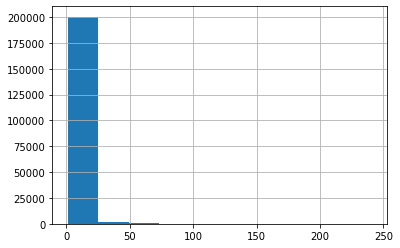

In [28]:
df_cast['actor'].value_counts().hist()

## Metadata Cleaning

In [30]:
df_meta = pd.read_csv('cleaned_meta.csv')  
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39472 entries, 0 to 39471
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             39472 non-null  int64  
 1   adult                  39472 non-null  bool   
 2   belongs_to_collection  4295 non-null   object 
 3   budget                 39472 non-null  int64  
 4   id                     39472 non-null  int64  
 5   imdb_id                39461 non-null  object 
 6   original_language      39466 non-null  object 
 7   original_title         39472 non-null  object 
 8   popularity             39471 non-null  float64
 9   production_companies   39471 non-null  object 
 10  production_countries   39471 non-null  object 
 11  release_date           39440 non-null  float64
 12  revenue                39471 non-null  float64
 13  runtime                39317 non-null  float64
 14  spoken_languages       39471 non-null  object 
 15  st

/Users/chebian/opt/anaconda3/envs/Python/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (18,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df_meta['budget'].value_counts()

0           31306
5000000       263
10000000      238
20000000      221
2000000       219
            ...  
8100000         1
115             1
1052753         1
63500           1
144             1
Name: budget, Length: 1141, dtype: int64

In [32]:
df_meta['revenue'].value_counts()

0.0            32564
12000000.0        20
11000000.0        19
10000000.0        18
2000000.0         16
               ...  
72527595.0         1
80916492.0         1
161834276.0        1
245724603.0        1
8888143.0          1
Name: revenue, Length: 6412, dtype: int64

In [33]:
df_zero = df_meta[df_meta['revenue'] == 0]

In [34]:
df_zero['budget'].value_counts()

0           29411
2000000       137
5000000       132
1000000       119
3000000       114
            ...  
152000          1
365000          1
16700000        1
650             1
16400000        1
Name: budget, Length: 697, dtype: int64

In [35]:
df_zero

Unnamed: 0  adult                              belongs_to_collection  \
2               2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...   
6               6  False                                                NaN   
7               7  False                                                NaN   
11             11  False                                                NaN   
21             21  False                                                NaN   
...           ...    ...                                                ...   
39467       45457  False                                                NaN   
39468       45458  False                                                NaN   
39469       45459  False                                                NaN   
39470       45461  False                                                NaN   
39471       45462  False                                                NaN   

         budget      id    imdb_id original_language  \
2             0   15602  tt0113228                en   
6      58000000   11860  tt0114319                en   
7             0   45325  tt0112302                en   
11            0   12110  tt0112896                en   
21            0    1710  tt0112722                en   
...         ...     ...        ...               ...   
39467         0  390959  tt0265736                en   
39468         0  289923  tt0252966                en   
39469         0  222848  tt0112613                en   
39470         0  439050  tt6209470                fa   
39471         0  111109  tt2028550                tl   

                    original_title  popularity  \
2                 Grumpier Old Men   11.712900   
6                          Sabrina    6.677277   
7                     Tom and Huck    2.561161   
11     Dracula: Dead and Loving It    5.430331   
21                         Copycat   10.701801   
...                            ...         ...   
39467    Shadow of the Blair Witch    0.076061   
39468          The Burkittsville 7    0.386450   
39469              Caged Heat 3000    0.661558   
39470                      رگ خواب    0.072051   
39471          Siglo ng Pagluluwal    0.178241   

                                    production_companies  ... vote_average  \
2      [{'name': 'Warner Bros.', 'id': 6194}, {'name'...  ...          6.5   
6      [{'name': 'Paramount Pictures', 'id': 4}, {'na...  ...          6.2   
7            [{'name': 'Walt Disney Pictures', 'id': 2}]  ...          5.4   
11     [{'name': 'Columbia Pictures', 'id': 5}, {'nam...  ...          5.7   
21     [{'name': 'Regency Enterprises', 'id': 508}, {...  ...          6.5   
...                                                  ...  ...          ...   
39467                                                 []  ...          7.0   
39468  [{'name': 'Neptune Salad Entertainment', 'id':...  ...          7.0   
39469    [{'name': 'Concorde-New Horizons', 'id': 4688}]  ...          3.5   
39470                                                 []  ...          4.0   
39471             [{'name': 'Sine Olivia', 'id': 19653}]  ...          9.0   

       vote_count          genre_0    genre_1 genre_2 genre_3 genre_4 genre_5  \
2            92.0          Romance     Comedy     NaN     NaN     NaN     NaN   
6           141.0           Comedy    Romance     NaN     NaN     NaN     NaN   
7            45.0           Action  Adventure   Drama  Family     NaN     NaN   
11          210.0           Comedy     Horror     NaN     NaN     NaN     NaN   
21          199.0            Drama   Thriller     NaN     NaN     NaN     NaN   
...           ...              ...        ...     ...     ...     ...     ...   
39467         2.0          Mystery     Horror     NaN     NaN     NaN     NaN   
39468         1.0           Horror        NaN     NaN     NaN     NaN     NaN   
39469         1.0  Science Fiction        NaN     NaN     NaN     NaN     NaN   
39470         1.0            Drama   

In [36]:
df_meta = pd.read_csv('cleaned_meta.csv')  
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39472 entries, 0 to 39471
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             39472 non-null  int64  
 1   adult                  39472 non-null  bool   
 2   belongs_to_collection  4295 non-null   object 
 3   budget                 39472 non-null  int64  
 4   id                     39472 non-null  int64  
 5   imdb_id                39461 non-null  object 
 6   original_language      39466 non-null  object 
 7   original_title         39472 non-null  object 
 8   popularity             39471 non-null  float64
 9   production_companies   39471 non-null  object 
 10  production_countries   39471 non-null  object 
 11  release_date           39440 non-null  float64
 12  revenue                39471 non-null  float64
 13  runtime                39317 non-null  float64
 14  spoken_languages       39471 non-null  object 
 15  st

/Users/chebian/opt/anaconda3/envs/Python/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (18,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
df_meta = df_meta.rename(columns = {'Unnamed: 0':'index'})

In [38]:
df_meta['en_movie'] = df_meta['original_language'].apply(lambda x: 1 if 'en' else 0 )

In [39]:
df_meta['total_vote'] = df_meta['vote_count'] * df_meta['vote_average']

In [40]:
genres = df_meta['genre_0'].value_counts().reset_index()['index'].to_list()
for x in range(0,8): 
    genre_col = 'genre_{}'.format(x)
    if x == 0: 
        df_genre = pd.get_dummies(df_meta[genre_col]).reset_index()
    else: 
        df_genre = df_genre.add(pd.get_dummies(df_meta[genre_col]).reset_index(),fill_value=0)
df_genre = df_genre.astype('int64')        

In [41]:
df_genre['index'] = df_genre['index'] /8

In [42]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39472 entries, 0 to 39471
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Action           39472 non-null  int64  
 1   Adventure        39472 non-null  int64  
 2   Animation        39472 non-null  int64  
 3   Comedy           39472 non-null  int64  
 4   Crime            39472 non-null  int64  
 5   Documentary      39472 non-null  int64  
 6   Drama            39472 non-null  int64  
 7   Family           39472 non-null  int64  
 8   Fantasy          39472 non-null  int64  
 9   Foreign          39472 non-null  int64  
 10  History          39472 non-null  int64  
 11  Horror           39472 non-null  int64  
 12  Music            39472 non-null  int64  
 13  Mystery          39472 non-null  int64  
 14  Romance          39472 non-null  int64  
 15  Science Fiction  39472 non-null  int64  
 16  TV Movie         39472 non-null  int64  
 17  Thriller    

In [43]:
for x in range(0,8): 
    genre_col = 'genre_{}'.format(x)
    df_meta = df_meta.drop(columns = [genre_col])

In [44]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39472 entries, 0 to 39471
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  39472 non-null  int64  
 1   adult                  39472 non-null  bool   
 2   belongs_to_collection  4295 non-null   object 
 3   budget                 39472 non-null  int64  
 4   id                     39472 non-null  int64  
 5   imdb_id                39461 non-null  object 
 6   original_language      39466 non-null  object 
 7   original_title         39472 non-null  object 
 8   popularity             39471 non-null  float64
 9   production_companies   39471 non-null  object 
 10  production_countries   39471 non-null  object 
 11  release_date           39440 non-null  float64
 12  revenue                39471 non-null  float64
 13  runtime                39317 non-null  float64
 14  spoken_languages       39471 non-null  object 
 15  st

In [45]:
df_credit = pd.read_csv('credits.csv')
df_credit = df_credit.drop_duplicates()
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45439 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45439 non-null  object
 1   crew    45439 non-null  object
 2   id      45439 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [46]:
def to_num(x): 
    try: 
        return len(ast.literal_eval(x))
    except:
        return 0 
df_meta['production_companies_num'] = df_meta['production_companies'].apply(lambda x: to_num(x))
df_meta['production_countries_num'] = df_meta['production_countries'].apply(lambda x: to_num(x))

In [47]:
df_credit['cast_num'] = df_credit['cast'].apply(lambda x: to_num(x))
df_credit['crew_num'] = df_credit['crew'].apply(lambda x: to_num(x))

In [48]:
df_crew = pd.read_csv('crew.csv')

In [49]:
df_crew_count  = df_crew.groupby(['movie','department'])['name'].count().reset_index()
df_crew_count= df_crew_count.rename(columns = {'name':'crew_count'})


In [50]:
df_crew_count.head(10)

movie         department  crew_count
0      2                Art           1
1      2             Camera           1
2      2  Costume & Make-Up           1
3      2          Directing           1
4      2            Editing           1
5      2            Writing           1
6      3                Art           2
7      3             Camera           3
8      3               Crew           1
9      3          Directing           2

In [53]:
df_crew_count = pd.pivot_table(df_crew_count, values = 'crew_count', index = ['movie'],columns = ['department'], aggfunc = np.sum).reset_index()
df_crew_count = df_crew_count.fillna(0)
df_crew_count = df_crew_count.astype('int64')   
df_crew_count.head()

department  movie  Actors  Art  Camera  Costume & Make-Up  Crew  Directing  \
0               2       0    1       1                  1     0          1   
1               3       0    2       3                  0     1          2   
2               5       0   10       8                  7    16          7   
3               6       0    3       1                  1     0          1   
4              11       0    4       1                  1     0          1   

department  Editing  Lighting  Production  Sound  Visual Effects  Writing  
0                 1         0           0      0               0        1  
1                 1         0           1      0               0        1  
2                 7         3          14     12               0        4  
3                 1         0           5      1               0        3  
4                 3         0           6      1               2        1

In [54]:
df_crew_gender = df_crew.groupby(['movie','gender'])['name'].count().reset_index().rename(columns = {'name' :'gender_count'})
df_crew_gender = pd.pivot_table(df_crew_gender, values = 'gender_count', index = ['movie'],columns = ['gender'], aggfunc = np.sum).reset_index()
df_crew_gender = df_crew_gender.fillna(0)
df_crew_gender = df_crew_gender.astype('int64') 
df_crew_gender = df_crew_gender.rename(columns = {0:'crew_unspecified',1:'crew_female',2:'crew_male'})

In [55]:
df_crew_gender

gender   movie  crew_unspecified  crew_female  crew_male
0            2                 4            0          2
1            3                 8            0          3
2            5                58            7         23
3            6                 5            2          9
4           11                 2            3         15
...        ...               ...          ...        ...
44656   465044                 4            0          0
44657   467731                 0            0          2
44658   468343                 1            0          0
44659   468707                 2            0          0
44660   469172                22            0          5

[44661 rows x 4 columns]

In [56]:
df_cast = pd.read_csv('cast.csv')
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562132 entries, 0 to 562131
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  562132 non-null  int64 
 1   movie       562132 non-null  int64 
 2   cast_id     562132 non-null  int64 
 3   charater    536355 non-null  object
 4   gender      562132 non-null  int64 
 5   actor       562132 non-null  object
dtypes: int64(4), object(2)
memory usage: 25.7+ MB


In [57]:
df_cast_num = df_cast.groupby('movie')['actor'].count().reset_index()
df_cast_num= df_cast_num.rename(columns = {'actor':'cast_num'})
df_cast_num

movie  cast_num
0           2         4
1           3         7
2           5        24
3           6        15
4          11       106
...       ...       ...
43013  464207         9
43014  465044         6
43015  467731        14
43016  468707         6
43017  469172        20

[43018 rows x 2 columns]

In [58]:
df_cast_gender = df_cast.groupby(['movie','gender'])['actor'].count().reset_index().rename(columns = {'actor' :'gender_count'})

In [59]:
df_cast_gender = pd.pivot_table(df_cast_gender, values = 'gender_count', index = ['movie'],columns = ['gender'], aggfunc = np.sum).reset_index()
df_cast_gender = df_cast_gender.fillna(0)
df_cast_gender = df_cast_gender.astype('int64') 
df_cast_gender = df_cast_gender.rename(columns = {0:'cast_unspecified',1:'cast_female',2:'cast_male'})

In [60]:
df_cast_gender

gender   movie  cast_unspecified  cast_female  cast_male
0            2                 3            0          1
1            3                 2            1          4
2            5                 2           14          8
3            6                 3            3          9
4           11                56            3         47
...        ...               ...          ...        ...
43013   464207                 1            1          7
43014   465044                 6            0          0
43015   467731                 7            0          7
43016   468707                 4            1          1
43017   469172                19            1          0

[43018 rows x 4 columns]

Merging tables:cast counts, cast count by gender, crew counts by department, crew count, crew count by gender 

In [61]:
df_credit_count = df_cast_num.merge(df_cast_gender, on = 'movie',how = 'left')

In [62]:
df_credit_count =df_credit_count.merge(df_crew_count, on = 'movie',how = 'left')
df_credit_count =df_credit_count.merge(df_crew_gender, on = 'movie',how = 'left')
df_credit_count = df_credit_count.rename(columns = {'movie' : 'movie_id'})

In [63]:
df_credit_count.head()

movie_id  cast_num  cast_unspecified  cast_female  cast_male  Actors   Art  \
0         2         4                 3            0          1     0.0   1.0   
1         3         7                 2            1          4     0.0   2.0   
2         5        24                 2           14          8     0.0  10.0   
3         6        15                 3            3          9     0.0   3.0   
4        11       106                56            3         47     0.0   4.0   

   Camera  Costume & Make-Up  Crew  Directing  Editing  Lighting  Production  \
0     1.0                1.0   0.0        1.0      1.0       0.0         0.0   
1     3.0                0.0   1.0        2.0      1.0       0.0         1.0   
2     8.0                7.0  16.0        7.0      7.0       3.0        14.0   
3     1.0                1.0   0.0        1.0      1.0       0.0         5.0   
4     1.0                1.0   0.0        1.0      3.0       0.0         6.0   

   Sound  Visual Effects  Writing  crew_unspecified  crew_female  crew_male  
0    0.0             0.0      1.0               4.0          0.0        2.0  
1    0.0             0.0      1.0               8.0          0.0        3.0  
2   12.0             0.0      4.0              58.0          7.0       23.0  
3    1.0             0.0      3.0               5.0          2.0        9.0  
4    1.0             2.0      1.0               2.0          3.0       15.0

In [64]:
df_credit_count.to_csv('credit_count.csv')

##### Reputable Director

In [65]:
df_director = pd.read_csv('director.csv')
df_director = df_director.rename(columns = {'movie' : 'id'})

In [66]:
df_meta = df_meta.merge(df_director, on = 'id',how = 'left')

In [67]:
reputable_diretor = df_meta.groupby('crew_id')['revenue'].sum().sort_values(ascending = False).reset_index()[df_meta.groupby('crew_id')['revenue'].sum().sort_values(ascending = False).reset_index()['revenue'] >= 1000000000]['crew_id'].to_list()

In [68]:
for dirc in df_meta.groupby('crew_id')['popularity'].mean().sort_values(ascending = False).reset_index().head(100)['crew_id'].to_list():
    if dirc not in reputable_diretor:
        reputable_diretor.append(dirc)

In [69]:
for dirc in df_meta.groupby('crew_id')['total_vote'].mean().sort_values(ascending = False).reset_index().head(100)['crew_id'].to_list():
    if dirc not in reputable_diretor:
        reputable_diretor.append(dirc)

In [70]:
df_meta['reputable_director'] = df_meta['crew_id'].apply(lambda x: 1 if x in reputable_diretor else 0 )

In [71]:
df_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49008 entries, 0 to 49007
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  49008 non-null  int64 
 1   id          49008 non-null  int64 
 2   credit_id   49008 non-null  object
 3   crew_id     49008 non-null  int64 
 4   department  49008 non-null  object
 5   name        49008 non-null  object
 6   job         49008 non-null  object
 7   gender      49008 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.0+ MB


In [72]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43457 entries, 0 to 43456
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     43457 non-null  int64  
 1   adult                     43457 non-null  bool   
 2   belongs_to_collection     4959 non-null   object 
 3   budget                    43457 non-null  int64  
 4   id                        43457 non-null  int64  
 5   imdb_id                   43445 non-null  object 
 6   original_language         43449 non-null  object 
 7   original_title            43457 non-null  object 
 8   popularity                43456 non-null  float64
 9   production_companies      43456 non-null  object 
 10  production_countries      43456 non-null  object 
 11  release_date              43423 non-null  float64
 12  revenue                   43456 non-null  float64
 13  runtime                   43299 non-null  float64
 14  spoken

##### Reputable Actor

In [73]:
df_cast = df_cast.rename(columns = {'movie':'id'})

In [74]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562132 entries, 0 to 562131
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  562132 non-null  int64 
 1   id          562132 non-null  int64 
 2   cast_id     562132 non-null  int64 
 3   charater    536355 non-null  object
 4   gender      562132 non-null  int64 
 5   actor       562132 non-null  object
dtypes: int64(4), object(2)
memory usage: 25.7+ MB


In [75]:
df_cast_copy = df_meta.merge(df_cast, on = 'id', how = 'left')[['id','budget','revenue','popularity','total_vote','vote_average','vote_count','cast_id','actor']]
df_cast_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553446 entries, 0 to 553445
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            553446 non-null  int64  
 1   budget        553446 non-null  int64  
 2   revenue       553435 non-null  float64
 3   popularity    553435 non-null  float64
 4   total_vote    553435 non-null  float64
 5   vote_average  553435 non-null  float64
 6   vote_count    553435 non-null  float64
 7   cast_id       551437 non-null  float64
 8   actor         551437 non-null  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 42.2+ MB


In [76]:
actor_revenue = df_cast_copy.groupby('actor')['revenue'].sum().sort_values(ascending = False).reset_index()
reputable_actor = actor_revenue[actor_revenue['revenue']>= np.percentile(actor_revenue['revenue'],90)]['actor'].to_list()

In [77]:
actor_popularity = df_cast_copy.groupby('actor')['popularity'].mean().sort_values(ascending = False).reset_index()
for act in actor_popularity[actor_popularity['popularity']>= np.percentile(actor_popularity['popularity'],90)]['actor'].to_list():
    if act not in reputable_actor:
        reputable_actor.append(actor)

In [78]:
actor_vote = df_cast_copy.groupby('actor')['total_vote'].mean().sort_values(ascending = False).reset_index()
for actor in actor_vote[actor_vote['total_vote']>= np.percentile(actor_vote['total_vote'],90)]['actor'].to_list():
    if act not in reputable_actor:
        reputable_actor.append(act)

In [79]:
len(reputable_actor)

18805

In [80]:
reputable_actor.sort()

In [81]:
df_cast['reputable_cast'] = df_cast['actor'].apply(lambda x: 1 if x in reputable_actor else 0 )

In [82]:
temp = df_cast.groupby('id')['reputable_cast'].sum().sort_values().reset_index()
df_cast_num = temp.merge(df_cast_num, left_on = 'id',right_on = 'movie', how = 'left')
df_cast_num['reputable_ratio'] = df_cast_num['reputable_cast']*100/df_cast_num['cast_num']

In [83]:
df_cast_num[df_cast_num['reputable_ratio'] > 30].sort_values(by = 'reputable_ratio')
df_cast_num['reputable_cast'] = df_cast_num['reputable_ratio'].apply(lambda x: 1 if x > 30 else 0)
df_cast_num = df_cast_num.drop(columns = ['movie','reputable_ratio'])
df_cast_num.head()

id  reputable_cast  cast_num
0      2               0         4
1  66720               0        13
2  66664               0         6
3  66638               0         6
4  66634               0         5

In [84]:
df_cast_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43018 entries, 0 to 43017
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              43018 non-null  int64
 1   reputable_cast  43018 non-null  int64
 2   cast_num        43018 non-null  int64
dtypes: int64(3)
memory usage: 1.3 MB


In [85]:
df_meta = df_meta.merge(df_cast_num, on = 'id', how = 'inner')

# Table Preview

In [86]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41448 entries, 0 to 41447
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     41448 non-null  int64  
 1   adult                     41448 non-null  bool   
 2   belongs_to_collection     4882 non-null   object 
 3   budget                    41448 non-null  int64  
 4   id                        41448 non-null  int64  
 5   imdb_id                   41438 non-null  object 
 6   original_language         41444 non-null  object 
 7   original_title            41448 non-null  object 
 8   popularity                41447 non-null  float64
 9   production_companies      41447 non-null  object 
 10  production_countries      41447 non-null  object 
 11  release_date              41434 non-null  float64
 12  revenue                   41447 non-null  float64
 13  runtime                   41307 non-null  float64
 14  spoken

In [87]:
df_meta = df_meta.drop(columns = ['belongs_to_collection','original_language','production_companies','production_countries','status','tagline','video'])

In [88]:
df_meta = df_meta.drop(columns = ['spoken_languages'])

In [89]:
df_meta = df_meta.drop(columns = ['department','crew_id','credit_id','job'])

In [90]:
df_meta = df_meta.drop(columns = ['Unnamed: 0'])

In [91]:
df_meta = df_meta.rename(columns ={'name':'director'})

In [92]:
df_meta = df_meta.merge(df_genre, on = 'index', how = 'left')

In [93]:
df_meta.to_csv('che_meta.csv')

In [94]:
df_meta = df_meta.dropna()

In [95]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36086 entries, 0 to 36425
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     36086 non-null  int64  
 1   adult                     36086 non-null  bool   
 2   budget                    36086 non-null  int64  
 3   id                        36086 non-null  int64  
 4   imdb_id                   36086 non-null  object 
 5   original_title            36086 non-null  object 
 6   popularity                36086 non-null  float64
 7   release_date              36086 non-null  float64
 8   revenue                   36086 non-null  float64
 9   runtime                   36086 non-null  float64
 10  title                     36086 non-null  object 
 11  vote_average              36086 non-null  float64
 12  vote_count                36086 non-null  float64
 13  en_movie                  36086 non-null  int64  
 14  total_

In [96]:
df_meta.isna().sum()

index                       0
adult                       0
budget                      0
id                          0
imdb_id                     0
original_title              0
popularity                  0
release_date                0
revenue                     0
runtime                     0
title                       0
vote_average                0
vote_count                  0
en_movie                    0
total_vote                  0
production_companies_num    0
production_countries_num    0
director                    0
gender                      0
reputable_director          0
reputable_cast              0
cast_num                    0
Action                      0
Adventure                   0
Animation                   0
Comedy                      0
Crime                       0
Documentary                 0
Drama                       0
Family                      0
Fantasy                     0
Foreign                     0
History                     0
Horror    

In [97]:
df_cast_num

id  reputable_cast  cast_num
0           2               0         4
1       66720               0        13
2       66664               0         6
3       66638               0         6
4       66634               0         5
...       ...             ...       ...
43013   68728               1       159
43014  259316               1       167
43015   13475               1       168
43016   39254               1       172
43017  324668               1       208

[43018 rows x 3 columns]

In [98]:
df_credit_count = df_credit_count.rename(columns=str.lower)
df_credit_count.head()

movie_id  cast_num  cast_unspecified  cast_female  cast_male  actors   art  \
0         2         4                 3            0          1     0.0   1.0   
1         3         7                 2            1          4     0.0   2.0   
2         5        24                 2           14          8     0.0  10.0   
3         6        15                 3            3          9     0.0   3.0   
4        11       106                56            3         47     0.0   4.0   

   camera  costume & make-up  crew  directing  editing  lighting  production  \
0     1.0                1.0   0.0        1.0      1.0       0.0         0.0   
1     3.0                0.0   1.0        2.0      1.0       0.0         1.0   
2     8.0                7.0  16.0        7.0      7.0       3.0        14.0   
3     1.0                1.0   0.0        1.0      1.0       0.0         5.0   
4     1.0                1.0   0.0        1.0      3.0       0.0         6.0   

   sound  visual effects  writing  crew_unspecified  crew_female  crew_male  
0    0.0             0.0      1.0               4.0          0.0        2.0  
1    0.0             0.0      1.0               8.0          0.0        3.0  
2   12.0             0.0      4.0              58.0          7.0       23.0  
3    1.0             0.0      3.0               5.0          2.0        9.0  
4    1.0             2.0      1.0               2.0          3.0       15.0

In [99]:
df_credit_count.to_csv('credit_count.csv')

In [100]:
df_original = pd.read_csv('movies_metadata.csv')

/Users/chebian/opt/anaconda3/envs/Python/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
